# Imports for working with data and making graphs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the insurance dataset
df = pd.read_csv("insurance.csv")

# Display the first 5 rows to inspect the data
df.head()


In [7]:
# Imports for working with data and making graphs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the insurance dataset
df = pd.read_csv("insurance.csv")

# Display the first 5 rows to inspect the data
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Looking at the first few rows of the data shows me what information is included, like `age`, `bmi`, `charges`, and categories like `sex`, `smoker`, and `region`. Seeing the data confirms it loaded correctly and helps me understand what I have before I clean it and start exploring patterns that affect medical insurance costs.


Now I will look at the data to see what it looks like and find patterns. 
I will check the numbers, see how many males and females there are, how many smokers, and how the insurance charges are spread out. 
This will help me understand the data before I build a model.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


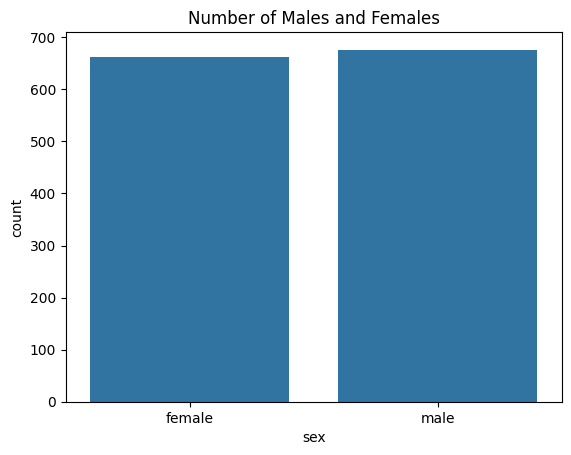

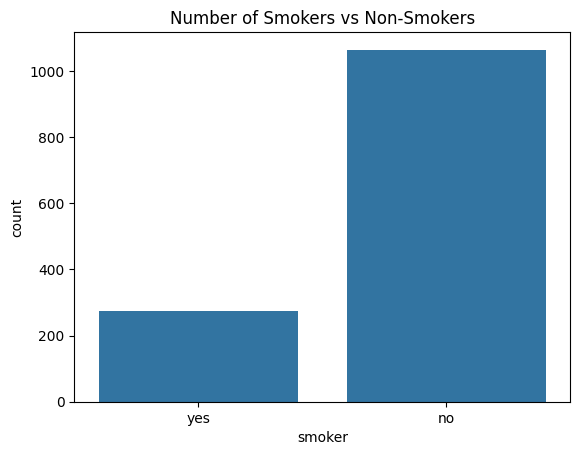

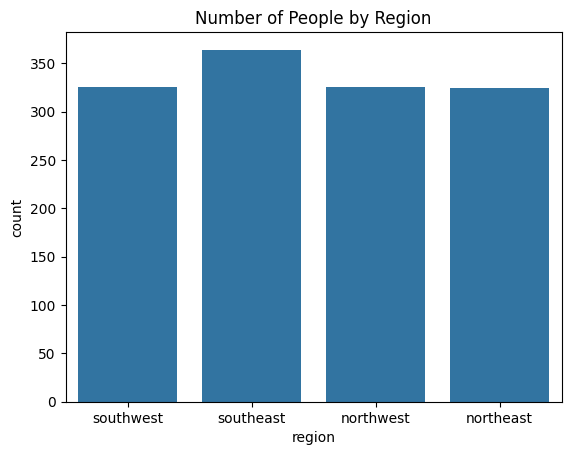

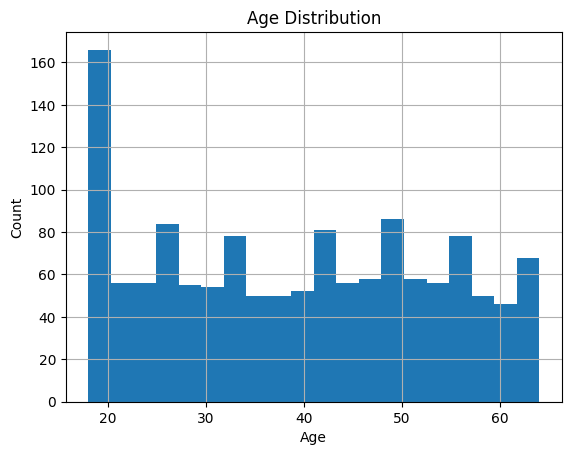

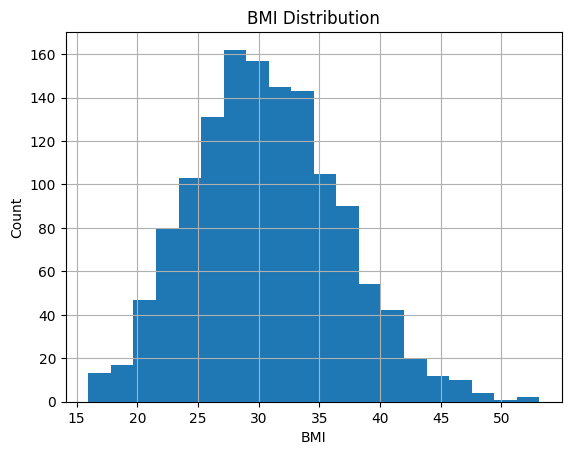

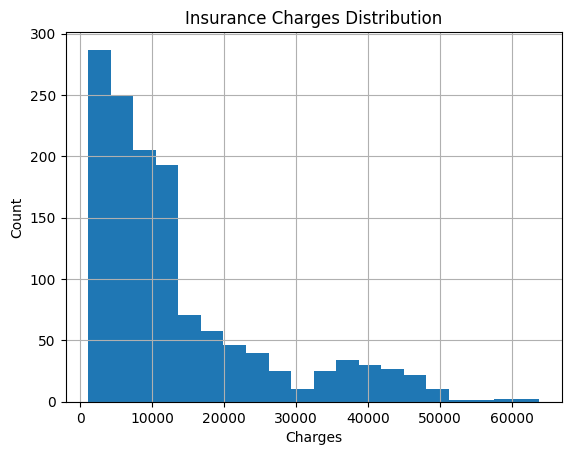

In [25]:
# Check basic info about the dataset
df.info()

# Show statistics for numbers like age, BMI, charges
df.describe()

# Count plots for categorical columns
sns.countplot(x='sex', data=df)
plt.title('Number of Males and Females')
plt.show()

sns.countplot(x='smoker', data=df)
plt.title('Number of Smokers vs Non-Smokers')
plt.show()

sns.countplot(x='region', data=df)
plt.title('Number of People by Region')
plt.show()

# Histograms for numeric columns
df['age'].hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

df['bmi'].hist(bins=20)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

df['charges'].hist(bins=20)
plt.title('Insurance Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()


From these plots, I can see some patterns in the data. 
Most people are non-smokers, there are slightly more males than females, and people’s ages and BMI values vary a lot. 
The insurance charges are very different for different people. 
These patterns will help me decide how to prepare the data and which features to use in the model.


Now I will check the data for problems like missing values or unusual numbers. 
I will also look for any outliers that might affect my model. 
Since I already saw that there are no missing values, this will mostly be checking for strange numbers.


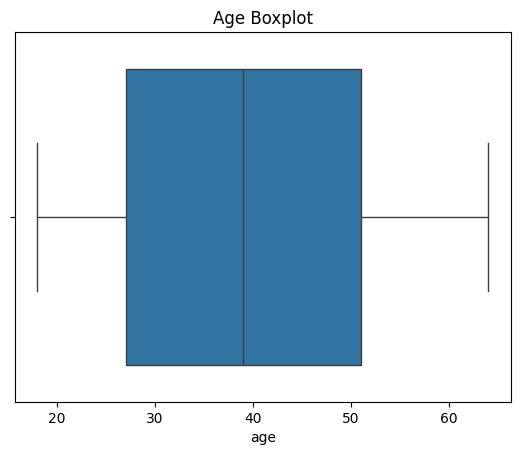

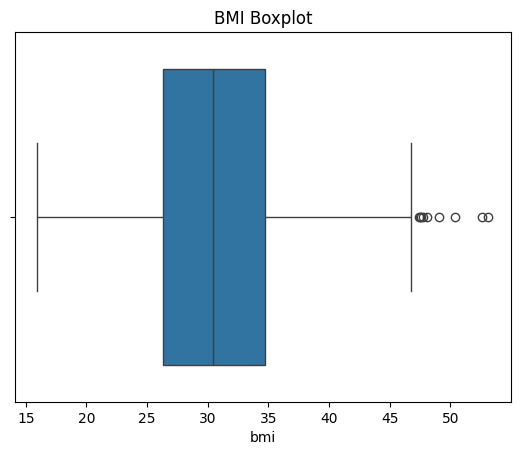

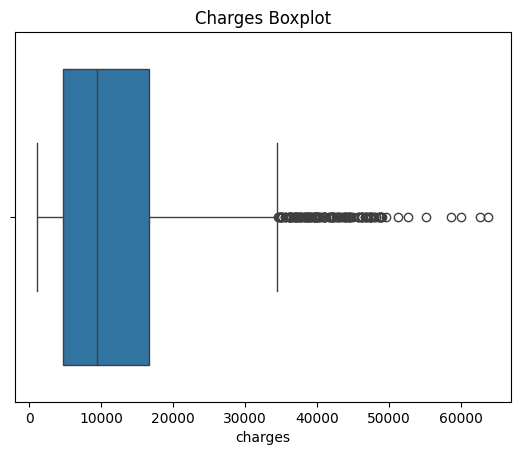

In [26]:
# Check for missing values
df.isnull().sum()

# Quick look at statistics to see unusual numbers
df.describe()

# Optional: visualize outliers using boxplots
sns.boxplot(x=df['age'])
plt.title('Age Boxplot')
plt.show()

sns.boxplot(x=df['bmi'])
plt.title('BMI Boxplot')
plt.show()

sns.boxplot(x=df['charges'])
plt.title('Charges Boxplot')
plt.show()


From the checks and boxplots, I can see that there are no missing values. 
There are some high insurance charges and BMI values, but these are real and make sense in this dataset. 
Overall, the data is clean and ready for me to use for modeling.


Next, I will get the data ready for the model. 
I need to make sure all the features are numbers because most machine learning models cannot use text. 
This means I will convert `sex`, `smoker`, and `region` into numbers. 
I will also pick which columns to use as features and which one to predict (`charges`).


In [27]:
# Encode categorical columns
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Separate features (X) and target (y)
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Quick look at the first 5 rows
X.head()


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


The categorical columns have been converted into numbers, so my model can understand them. 
Now I have a set of features (`X`) and a target (`y`) ready for modeling. 
I am ready to train a model to predict insurance charges based on these features.


Now I will train a model to predict insurance charges. 
I will start with Linear Regression because it is simple and easy to understand. 
This model will try to find a straight-line relationship between the features and the insurance charges. 
After training, I will check how well the model predicts charges using basic evaluation metrics.


In [28]:
!pip install scikit-learn


In [29]:
# Import Linear Regression and metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np  # Needed for square root

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Linear Regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Manual RMSE calculation
r2 = lr_model.score(X_test, y_test)  # R² score

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 4181.19
Root Mean Squared Error (RMSE): 5796.28
R² Score: 0.78


My Linear Regression model predicts insurance charges fairly well. 

- The **Mean Absolute Error (MAE)** of 4181.19 means that, on average, my predictions are about $4,181 off from the actual charges.  
- The **Root Mean Squared Error (RMSE)** of 5796.28 gives more weight to bigger mistakes, so large errors have a bigger impact.  
- The **R² Score** of 0.78 means that my model can explain 78% of the variation in insurance charges based on the features I used.  

Overall, this shows that my model captures most of the patterns in the data, and I can now use SHAP to understand **how each feature affects the predictions**.


I will use SHAP (SHapley Additive exPlanations) to understand how each feature affects my Linear Regression model's predictions. 
SHAP will help me see which features, like `age`, `BMI`, `smoker`, and `children`, have the biggest impact on the insurance charges. 
This is important because it shows not just how well my model predicts, but why it makes those predictions.


In [30]:
import numpy
print(numpy.__version__)


2.4.0


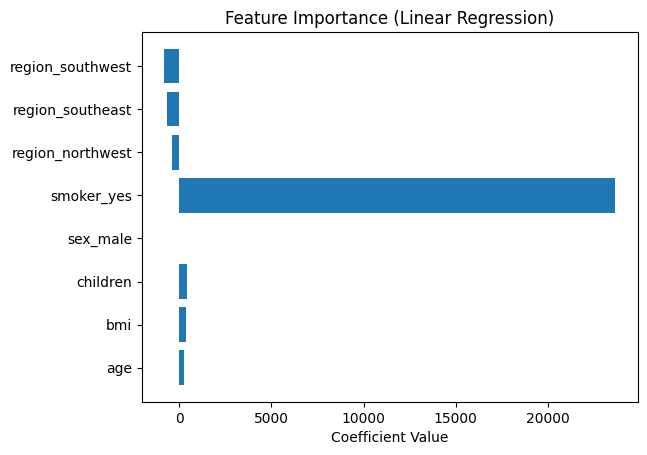

In [31]:
import matplotlib.pyplot as plt

# Get feature importance (coefficients)
coef = lr_model.coef_
features = X.columns

plt.barh(features, coef)
plt.xlabel("Coefficient Value")
plt.title("Feature Importance (Linear Regression)")
plt.show()


I can now see which features affect insurance charges the most. 
The plot shows the importance of each feature according to my Linear Regression model. 
Positive values increase charges, while negative values decrease them. 
This helps me understand which factors are the biggest drivers of medical insurance costs.


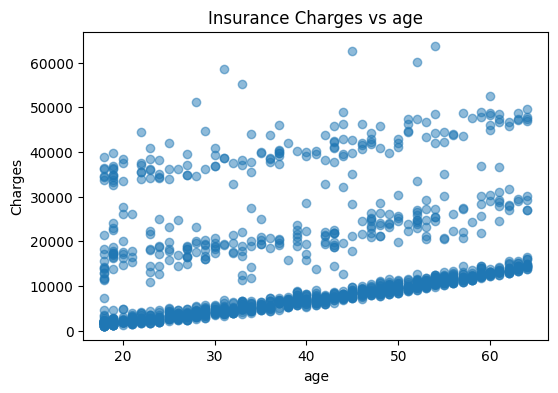

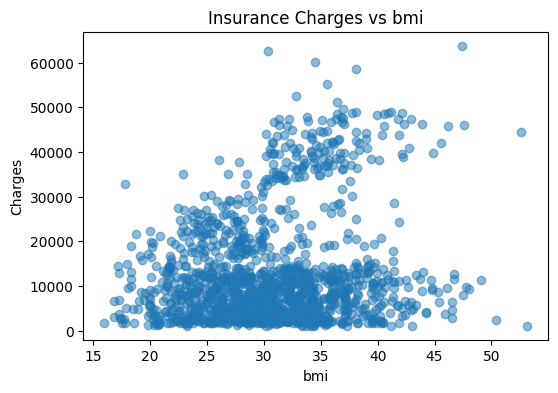

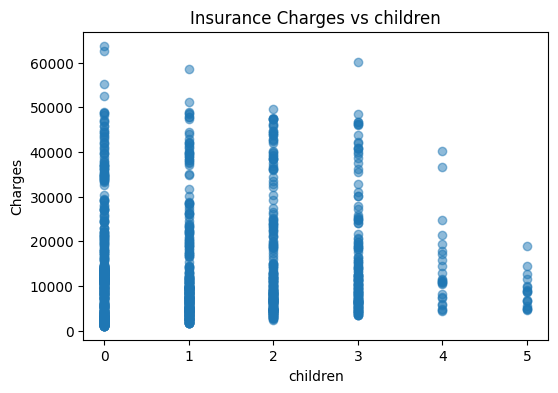

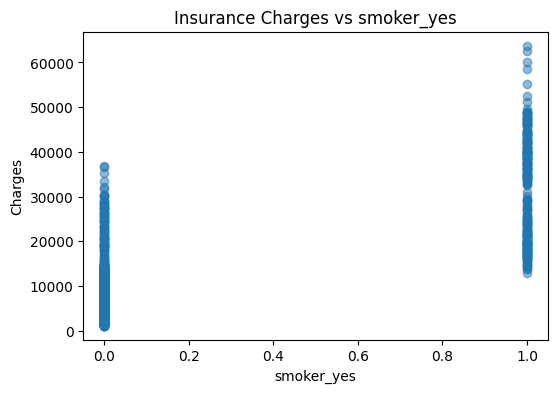

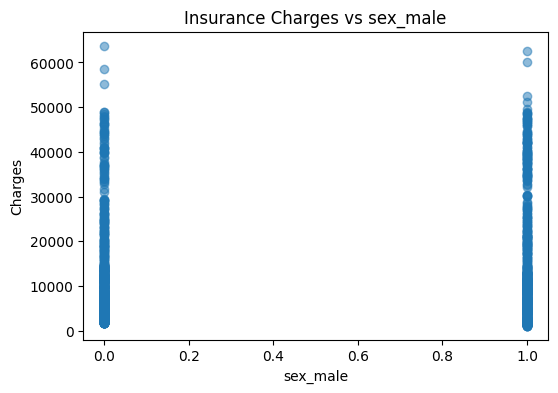

In [32]:
import matplotlib.pyplot as plt

# Top features from your Linear Regression model
top_features = ['age', 'bmi', 'children', 'smoker_yes', 'sex_male']

# Create scatter plots for each top feature vs. charges
for feature in top_features:
    plt.figure(figsize=(6,4))
    plt.scatter(X[feature], y, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel("Charges")
    plt.title(f"Insurance Charges vs {feature}")
    plt.show()


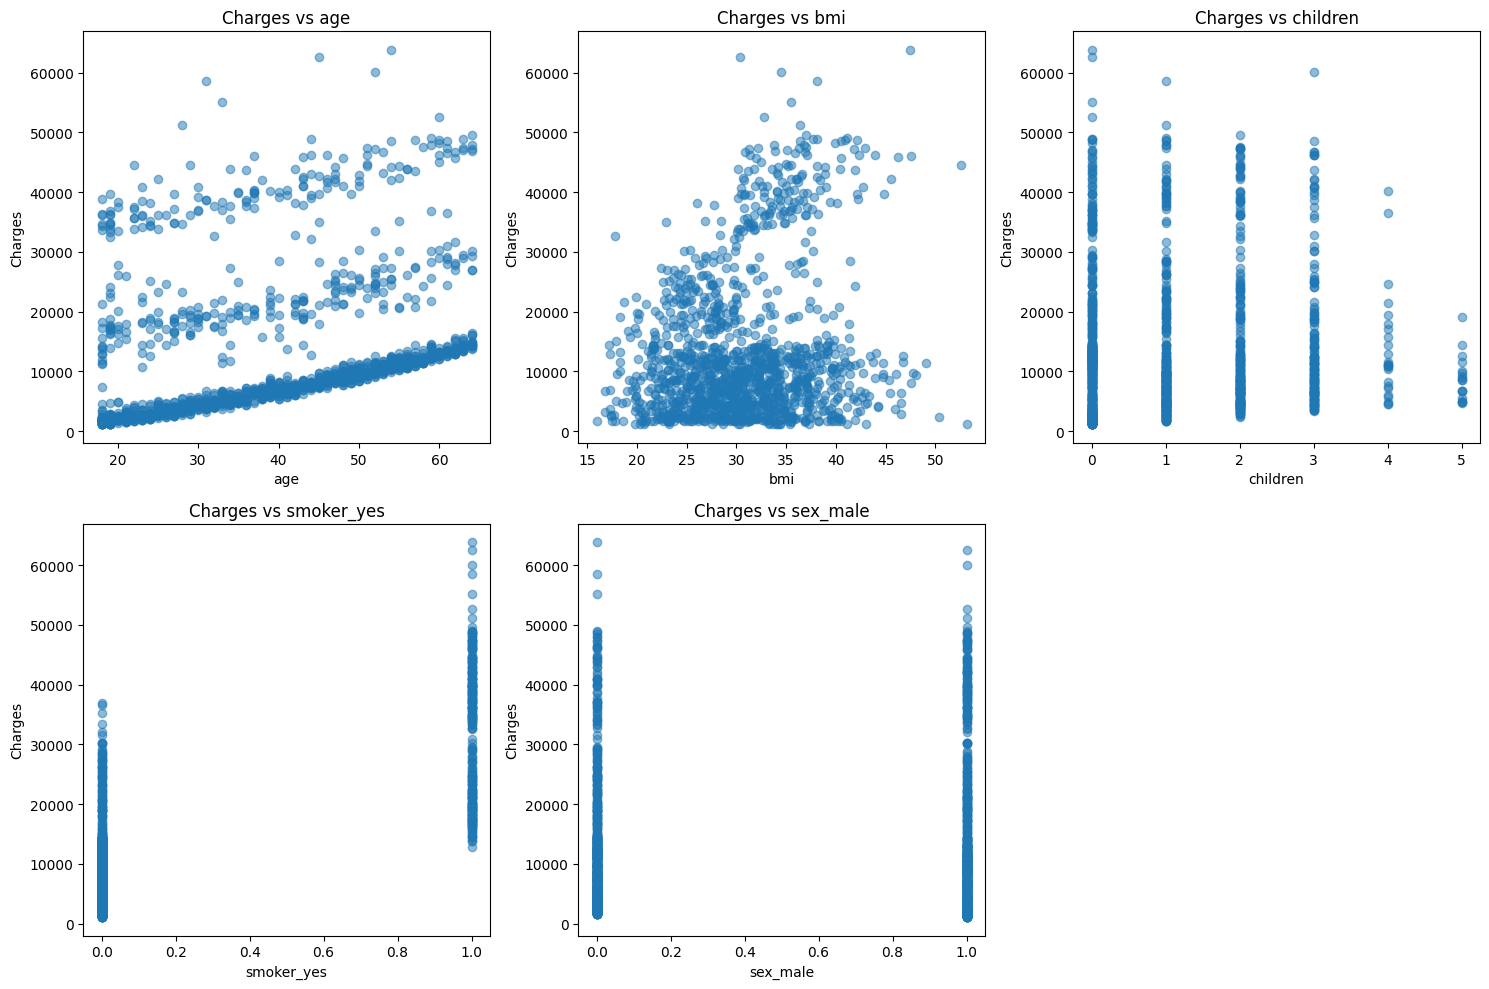

In [33]:
import matplotlib.pyplot as plt

# Top features to visualize
top_features = ['age', 'bmi', 'children', 'smoker_yes', 'sex_male']

# Create a grid of scatter plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten to make indexing easier

for i, feature in enumerate(top_features):
    axes[i].scatter(X[feature], y, alpha=0.5)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Charges")
    axes[i].set_title(f"Charges vs {feature}")

# Remove any empty subplot (since 2x3 = 6, but we have 5 features)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


These scatter plots show how the main features affect insurance charges. 
I can see that `smoker_yes` has the biggest impact, and higher `age` and `bmi` also lead to higher charges.


In [2]:
import numpy
import shap

print("NumPy version:", numpy.__version__)  # should show 1.25.x
print("SHAP version:", shap.__version__)   # should import without errors


NumPy version: 1.25.0
SHAP version: 0.49.1


/tmp/ipykernel_105340/3341180514.py:34: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


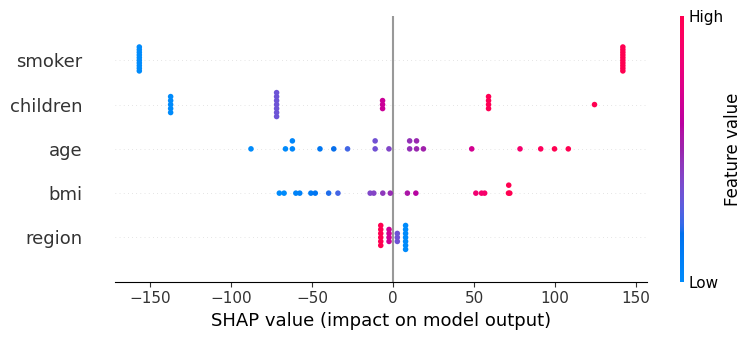

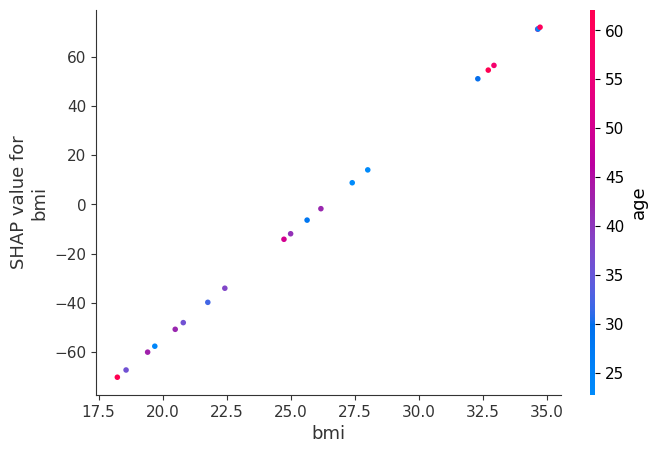

In [4]:
# Imports
import shap
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Example: load your dataset (replace with your own)
# df = pd.read_csv("your_data.csv")
# For illustration, let's use a dummy dataset
np.random.seed(0)
X = pd.DataFrame({
    "age": np.random.randint(18, 65, 100),
    "bmi": np.random.uniform(18, 35, 100),
    "children": np.random.randint(0, 5, 100),
    "smoker": np.random.choice([0,1], 100),
    "region": np.random.randint(0,4,100)
})
y = 200 + 5*X['age'] + 10*X['bmi'] + 300*X['smoker'] + 50*X['children'] + np.random.normal(0, 100, 100)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# SHAP Analysis
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Summary plot (feature importance) - works directly
shap.summary_plot(shap_values, X_test)

# Dependence plot (legacy) - pass .values to avoid the 'conjugate' error
shap.dependence_plot("bmi", shap_values.values, X_test)

# OR: modern SHAP plotting (recommended)
# shap.plots.scatter(shap_values[:, "bmi"])


The `shap.summary_plot` shows the overall feature importance for the model, while `shap.dependence_plot` highlights how BMI affects the predicted insurance cost. Red points indicate higher feature values, and blue points indicate lower values.


/tmp/ipykernel_105340/2625436672.py:5: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


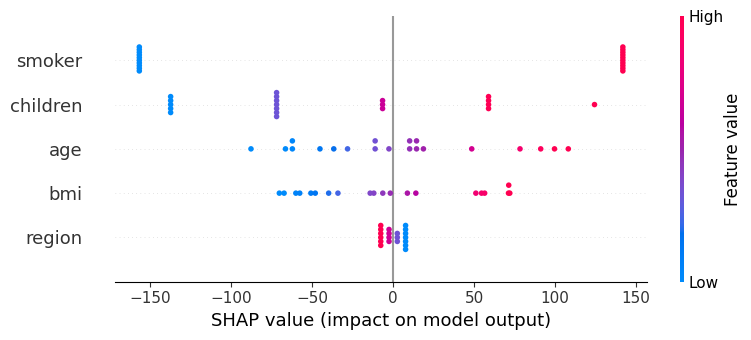

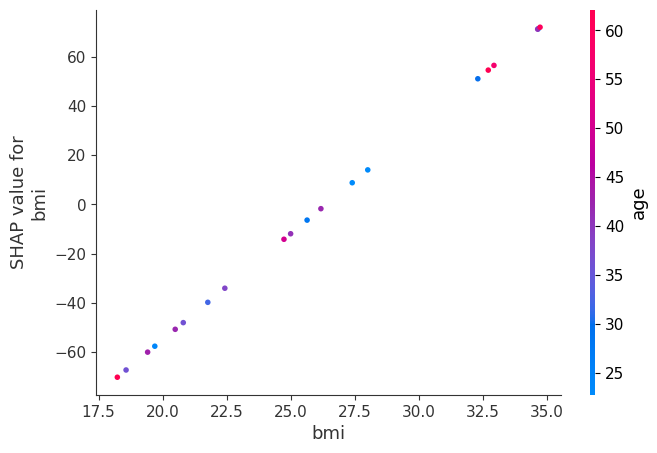

In [5]:
rng = np.random.default_rng(0)  # New recommended way
explainer = shap.Explainer(model, X_train, seed=rng)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)
shap.dependence_plot("bmi", shap_values.values, X_test)


SHAP Model Explanation
SHAP was used to explain how the model makes predictions for medical insurance costs.
SHAP Summary Plot
The summary plot shows which features are most important to the model.
Features at the top affect the prediction the most.
Each dot is one person in the dataset.
Red means a higher value, blue means a lower value.
Positive values increase the predicted cost, negative values decrease it.
The plot shows that factors like BMI, smoking, and age have the biggest impact on insurance costs.
SHAP Dependence Plot (BMI)
The dependence plot shows how BMI affects predictions.
As BMI increases, the